In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [16]:
df=pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [17]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


<Axes: >

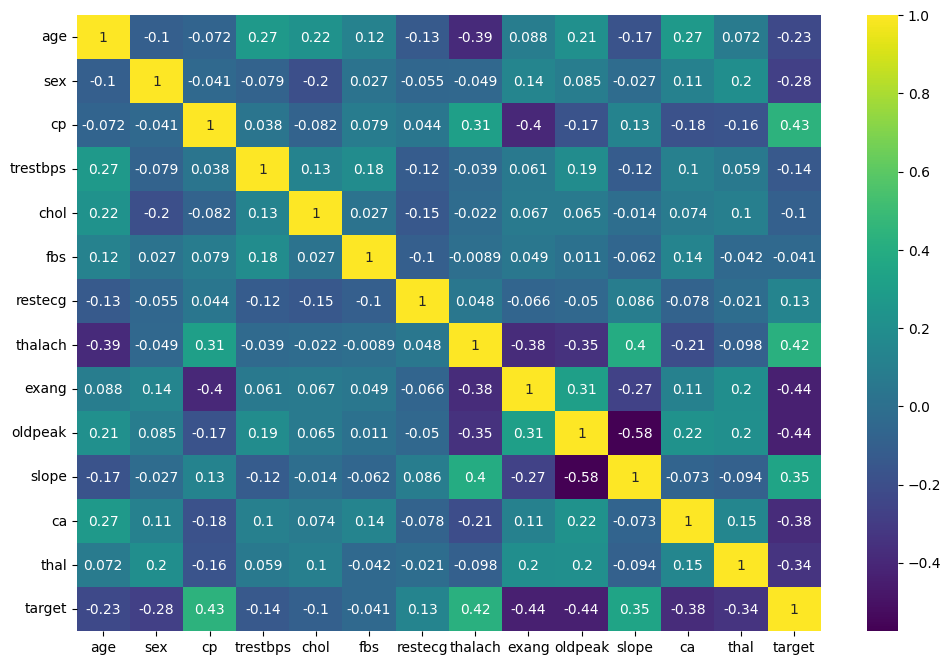

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

<Axes: xlabel='age', ylabel='count'>

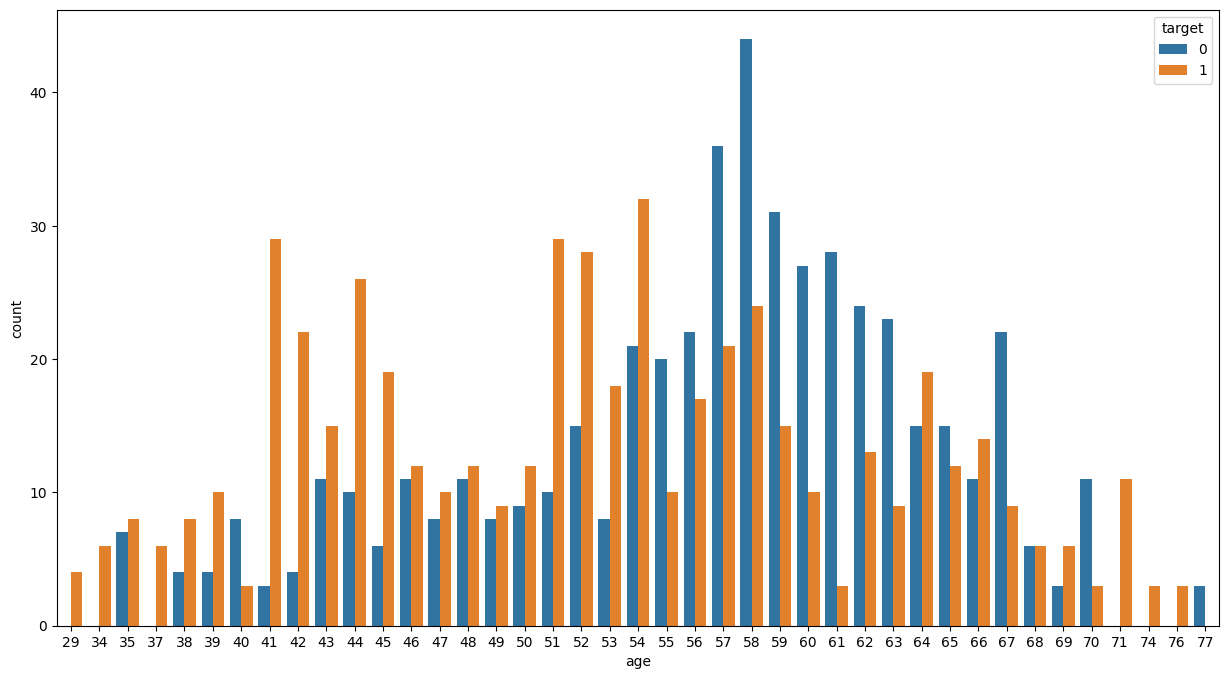

In [20]:
plt.figure(figsize=(15, 8))
sns.countplot(df, x='age', hue='target')

In [21]:
# from ydata_profiling import ProfileReport
# profile= ProfileReport(df)
# profile.to_notebook_iframe()

<Axes: >

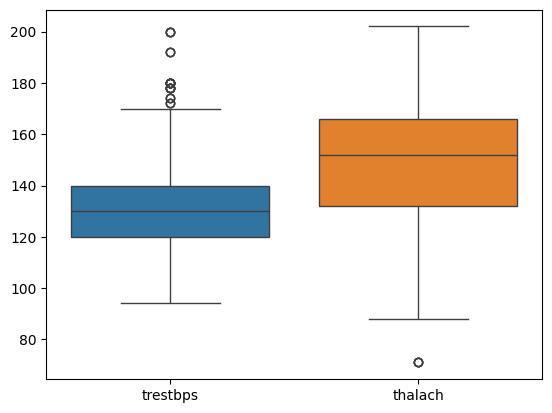

In [22]:
sns.boxplot(df[['trestbps','thalach']])

<Axes: >

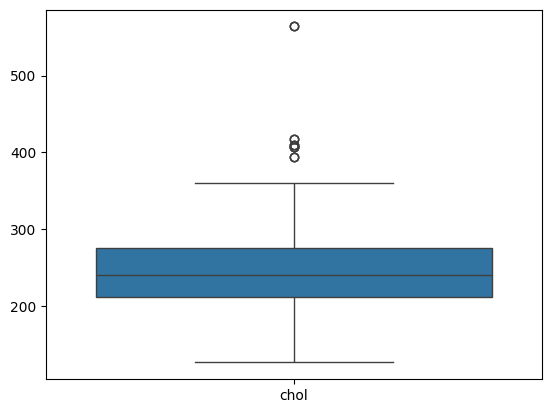

In [23]:
sns.boxplot(df[['chol']])

In [24]:
y=df['target']
X=df.drop('target', axis=1)

Text(0.5, 1.0, "Heart's target countplot")

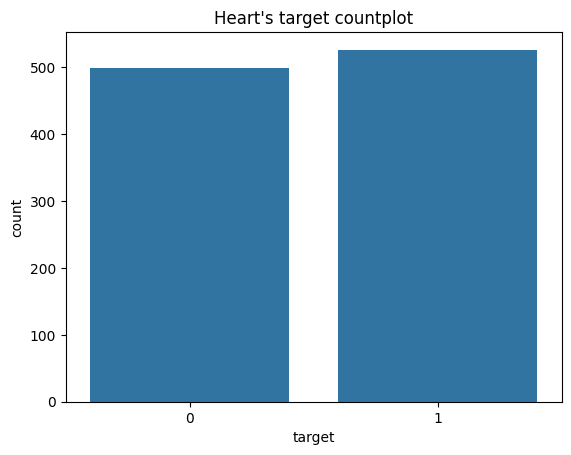

In [25]:
import seaborn as sns
sns.countplot(df, x=y)
plt.title("Heart's target countplot")

In [26]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

### Model Building

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [28]:
lr_clf= LogisticRegression()
svm_clf= SVC(kernel='linear')
knn_clf= KNeighborsClassifier()
rf_clf= RandomForestClassifier(random_state=1000)
xgb_clf= XGBClassifier() 

In [29]:
lr_clf.fit(X_train, y_train)
svm_clf.fit(X_train, y_train)
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
xgb_clf.fit(X_train, y_train)

c:\Users\Mariam\predapp\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Test and evaluation

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [31]:
y_pred1= lr_clf.predict(X_test)
accuracy_score(y_test, y_pred1)

0.7804878048780488

In [32]:
y_pred2= svm_clf.predict(X_test)
accuracy_score(y_test, y_pred2)

0.8048780487804879

In [33]:
y_pred3= knn_clf.predict(X_test)
accuracy_score(y_test, y_pred3)

c:\Users\Mariam\predapp\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7317073170731707

In [34]:
y_pred4= rf_clf.predict(X_test)
accuracy_score(y_test, y_pred4)
print("Test accuracy", accuracy_score(y_test, y_pred4))
print("Train accuracy", rf_clf.score(X_train, y_train))

Test accuracy 0.9853658536585366
Train accuracy 1.0


In [35]:
y_pred5= xgb_clf.predict(X_test)
print("Test accuracy", accuracy_score(y_test, y_pred5))
print("Train accuracy", xgb_clf.score(X_train, y_train))

Test accuracy 0.9853658536585366
Train accuracy 1.0


### Hyper Paramter Tuning

In [36]:
import numpy as np
from sklearn.model_selection import GridSearchCV
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [0.1, 1, 10, 100, 1000],  
            'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
            #'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
     'knn': {
        'model': KNeighborsClassifier(),
        'params' : {
            'n_neighbors' : [10,7,9,11,13,15],
            'weights' : ['uniform','distance'],
            'metric' : ['minkowski','euclidean','manhattan']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(random_state=1234),
        'params' : {
            'n_estimators': [1,5,10],
            'max_depth':[3,10,2],
            'max_leaf_nodes': [3, 6, 9]
        }
    },
    'xg_boost': {
        'model': XGBClassifier(random_state=1234),
        'params' : {
            'n_estimators': [5,10,15],
            'max_depth': [3, 6, 9], 
            'max_leaf_nodes': [3, 6, 9]
        }
    },
    
    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
            #'C': [1,5,10,15],
            'C' : np.logspace(-4, 4, 20),
            'max_iter' : [200, 300,1000]
        }
    }
}

In [37]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

c:\Users\Mariam\predapp\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Mariam\predapp\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

,model,best_score,best_params
0,svm,0.960976,"{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}"
1,knn,0.970732,"{'metric': 'manhattan', 'n_neighbors': 11, 'we..."
2,random_forest,0.870732,"{'max_depth': 3, 'max_leaf_nodes': 9, 'n_estim..."
3,xg_boost,0.976829,"{'max_depth': 9, 'max_leaf_nodes': 3, 'n_estim..."
4,logistic_regression,0.857317,"{'C': 1.623776739188721, 'max_iter': 300}"


In [38]:
model1= LogisticRegression(C= 545.55, max_iter=500)
model1.fit(X_train, y_train)
y_pred_lr= model1.predict(X_test)

c:\Users\Mariam\predapp\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
print("The training score with LogisticRegression is:", model1.score(X_train, y_train))
print("The test score with LogisticRegression is:", model1.score(X_test, y_test))

The training score with LogisticRegression is: 0.8719512195121951
The test score with LogisticRegression is: 0.7951219512195122


In [40]:
#from xgboost import XGBClassifier
#model2= XGBClassifier(max_depth=9)
model2= RandomForestClassifier()
model2.fit(X_train, y_train)
y_pred_rf= model2.predict(X_test)

In [41]:
print("The training score with RandomForest is:", model2.score(X_train, y_train))
print("The test score with RandomForest is:", model2.score(X_test, y_test))

The training score with RandomForest is: 1.0
The test score with RandomForest is: 0.9853658536585366


In [42]:
model3= SVC(C= 1000, gamma= 0.001, kernel='rbf')
model3.fit(X_train, y_train)
y_pred_svm= model3.predict(X_test)
print("The training score with SVM is:", model3.score(X_train, y_train))
print("The test score with SVM is:", model3.score(X_test, y_test))

The training score with SVM is: 1.0
The test score with SVM is: 1.0


Confusion Matrix for Random Forest Model


<Axes: >

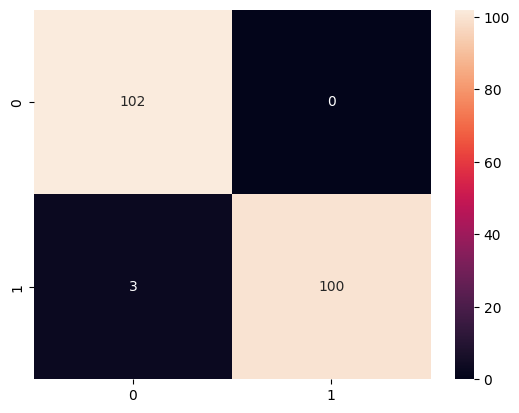

In [43]:
print("Confusion Matrix for Random Forest Model")
sns.heatmap(confusion_matrix(y_test,y_pred_rf), fmt='d', annot=True)

In [44]:
print("Classification_report for Random Forest")
print(classification_report(y_test, y_pred_rf))

Classification_report for Random Forest
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



Confusion Matrix for SVM Model


<Axes: >

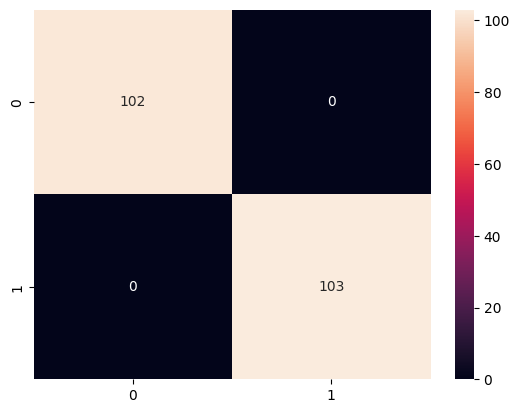

In [45]:
print("Confusion Matrix for SVM Model")
sns.heatmap(confusion_matrix(y_test,y_pred_svm), fmt='d', annot=True)

In [46]:
print("Classification_report for SVM")
print(classification_report(y_test, y_pred_svm))

Classification_report for SVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       103

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [47]:
# from sklearn.feature_selection import RFECV
# from sklearn.preprocessing import StandardScaler
# #Standardize the features (optional but often recommended)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
# # Create a logistic regression model\n"
# logreg = LogisticRegression(C= 0.23, max_iter=100)

In [48]:
# #Create RFECV with logistic regression\n",
# selector = RFECV(estimator=logreg, step=1, cv=5)
# X_train_selected = selector.fit_transform(X_train_scaled, y_train)
# X_test_selected = selector.transform(X_test_scaled)

In [49]:
# #Assuming model is your previously trained model
# model_selected=logreg.fit(X_train_selected, y_train)

In [50]:
# # evaluate performance\n",
# y_pred_selected = model_selected.predict(X_test_selected)
# accuracy_selected = accuracy_score(y_test, y_pred_selected)
# print("Accuracy with selected features:", accuracy_selected)

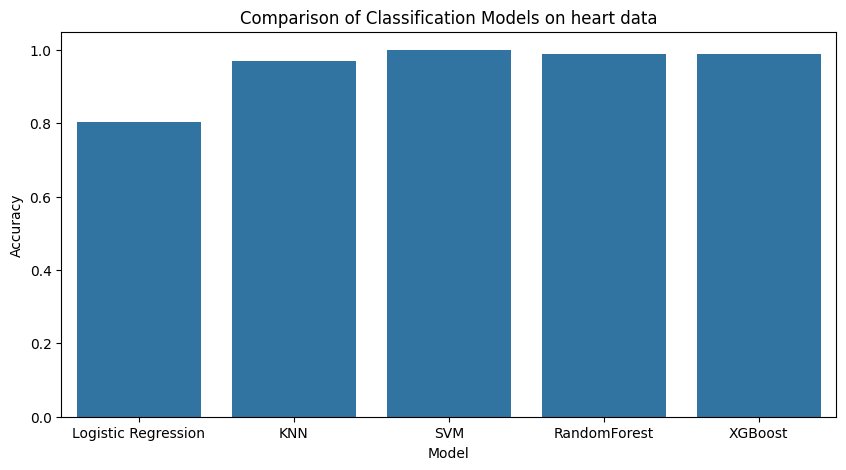

In [51]:
accuracy_scores = {
    'Logistic Regression': 0.804878,
    'KNN': 0.970732,
    'SVM':  1.00,
    'RandomForest':0.99,
    'XGBoost': 0.99
}

# Convert the dictionary to a pandas DataFrame
import pandas as pd
df = pd.DataFrame(list(accuracy_scores.items()), columns=['Model', 'Accuracy'])

# Create a barplot
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Accuracy', data=df)
plt.title('Comparison of Classification Models on heart data')
plt.show()

### ROC Curve

In [52]:
from sklearn.metrics import roc_curve, roc_auc_score 

In [53]:
# Compute the false positive rate (FPR)  
# and true positive rate (TPR) for different classification thresholds 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm, pos_label=1)

In [54]:
fpr, tpr, thresholds

(array([0., 0., 1.]), array([0., 1., 1.]), array([2, 1, 0], dtype=int64))

In [55]:

# Compute the ROC AUC score 
roc_auc = roc_auc_score(y_test, y_pred_lr) 
roc_auc

0.7947363411383972

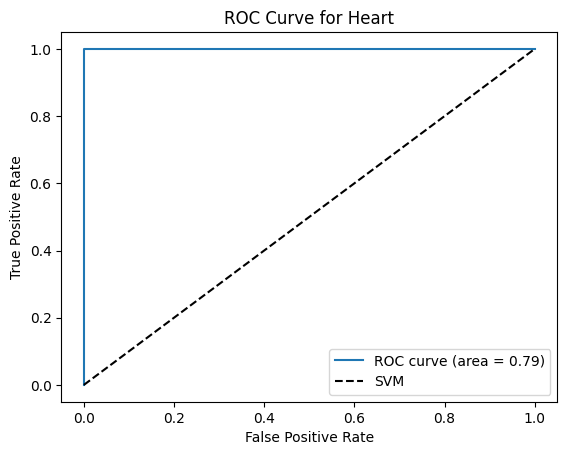

In [56]:
# Plot the ROC curve 
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc) 
# roc curve for tpr = fpr 
plt.plot([0, 1], [0, 1], 'k--', label='SVM') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve for Heart') 
plt.legend(loc="lower right") 
plt.show()


In [63]:
# import pickle
# filename = 'heart_model.sav'
# pickle.dump(model3, open(filename, 'wb'))

In [64]:
# loading the saved model
#loaded_model = pickle.load(open('heart_model.sav', 'rb'))

In [65]:
import joblib
filename = 'heart_model.joblib'
joblib.dump(model3, open(filename, 'wb'))

In [66]:
# loading the saved model
loaded_model = joblib.load(open('heart_model.joblib', 'rb'))

### Testing Model

In [69]:
#input_data = (85,0,1,85,80,0,0,10,0,3.6,1,5,5)
input_data=(63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
    print('The Person have a less chance to be affected by Heart Disease')
else:
    print('The Person has a high probability to be affected by Heart Disease')

[1]
The Person has a high probability to be affected by Heart Disease
